# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание исследования.**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
_____
**Цель исследования.**

Научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

_____
**Задача исследования.**

Установить параметры для определения рыночной стоимости объектов недвижимости

**Исходные данные.**
    
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Набор данных включает следующие поля:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении



## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
pd.set_option('display.float_format', '{:,.2f}'.format)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


**Также выведем уникальные значения по всем столбцам - посмотрим есть ли какие-то аномалии**

In [4]:
for col in data.columns:    
    try:
        values = sorted(data[col].unique())
        # если больше 10 значений, выведем только первые и последние 5
        if len(values) > 10:
            display (col, values[:5], values[-5:])
        else: display(col, values)
    except:
        display(f'После except: {col}', data[col].unique())   
        

'total_images'

[0, 1, 2, 3, 4]

[35, 37, 39, 42, 50]

'last_price'

[12190.0, 430000.0, 440000.0, 450000.0, 470000.0]

[300000000.0, 330000000.0, 401300000.0, 420000000.0, 763000000.0]

'total_area'

[12.0, 13.0, 13.2, 14.0, 15.0]

[590.0, 618.0, 631.0, 631.2, 900.0]

'first_day_exposition'

['2014-11-27T00:00:00',
 '2014-11-29T00:00:00',
 '2014-12-04T00:00:00',
 '2014-12-05T00:00:00',
 '2014-12-08T00:00:00']

['2019-04-29T00:00:00',
 '2019-04-30T00:00:00',
 '2019-05-01T00:00:00',
 '2019-05-02T00:00:00',
 '2019-05-03T00:00:00']

'rooms'

[0, 1, 2, 3, 4]

[12, 14, 15, 16, 19]

'ceiling_height'

[1.0, 2.0, 2.3, 2.4, 2.45]

[26.0, 27.0, 27.5, 32.0, 100.0]

'floors_total'

[1.0, 2.0, 3.0, 4.0, 5.0]

[35.0, 36.0, 37.0, 52.0, 60.0]

'living_area'

[2.0, 3.0, 9.0, 10.0, 10.6]

[322.3, 332.0, 347.5, 409.0, 409.7]

'floor'

[1, 2, 3, 4, 5]

[29, 30, 31, 32, 33]

'is_apartment'

[nan, False, True]

'studio'

[False, True]

'open_plan'

[False, True]

'kitchen_area'

[1.3, 3.0, 4.5, 4.9, 5.0]

[93.2, 100.0, 100.7, 107.0, 112.0]

'balcony'

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

'После except: locality_name'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

'airports_nearest'

[0.0, 6450.0, 6995.0, 7019.0, 7026.0]

[83758.0, 84006.0, 84665.0, 84853.0, 84869.0]

'cityCenters_nearest'

[208.0, 287.0, 318.0, 399.0, 436.0]

[64857.0, 65105.0, 65764.0, 65952.0, 65968.0]

'parks_around3000'

[0.0, 1.0, 2.0, nan, 3.0]

'parks_nearest'

[1.0, 11.0, 13.0, 19.0, 36.0]

[2905.0, 2984.0, 3013.0, 3064.0, 3190.0]

'ponds_around3000'

[0.0, 1.0, 2.0, 3.0, nan]

'ponds_nearest'

[13.0, 19.0, 22.0, 36.0, 55.0]

[1299.0, 1313.0, 1337.0, 1341.0, 1344.0]

'days_exposition'

[nan, 1.0, 2.0, 3.0000000000000004, 4.0]

[1512.0000000000002, 1513.0000000000002, 1553.0000000000002, 1572.0, 1580.0]

### Вывод



- нужно переименовать колонку 'cityCenters_nearest'
- столбец с датой записан в виде строки - нужно преобразовать в формат даты
- высота потолков свыше 10м похожа на аномалию, возможно ошиблись порядком
- в 'locality_name' буквы 'ё' нужно заменить на 'е', иначе некоторые одинаковые населенные пункты будут идентифицированы как разные


## Предобработка данных

Переименуем столбец

In [5]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

Преобразуем ячейки с датами в формате строк в формат даты

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим на квартиры с потолками выше 10м

In [7]:
data.query('ceiling_height > 10').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,"15,000,000.00",25.00,2018-07-25,1,100.00,5.00,14.00,5,True,...,11.00,5.00,Санкт-Петербург,"34,963.00","8,283.00",1.00,223.00,3.00,30.00,19.00
22336,19,"9,999,000.00",92.40,2019-04-05,2,32.00,6.00,55.50,5,False,...,16.50,4.00,Санкт-Петербург,"18,838.00","3,506.00",0.00,NaN,3.00,511.00,NaN
5807,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36.00,41.00,13,NaN,...,12.00,5.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00
20478,11,"8,000,000.00",45.00,2017-07-18,1,27.00,4.00,22.00,2,NaN,...,10.00,1.00,Санкт-Петербург,"18,975.00","3,246.00",0.00,NaN,3.00,449.00,429.00
17496,15,"6,700,000.00",92.90,2019-02-19,3,20.00,17.00,53.20,14,NaN,...,12.00,5.00,Санкт-Петербург,"16,295.00","15,092.00",1.00,967.00,0.00,NaN,NaN
20507,12,"5,950,000.00",60.00,2018-02-19,2,22.60,14.00,35.00,11,NaN,...,13.00,1.00,Санкт-Петербург,"27,028.00","12,570.00",0.00,NaN,0.00,NaN,40.00
15061,19,"5,600,000.00",56.40,2018-05-11,2,14.00,14.00,32.40,5,NaN,...,9.10,2.00,Санкт-Петербург,"14,814.00","13,610.00",0.00,NaN,0.00,NaN,315.00
22309,20,"5,300,000.00",45.00,2017-09-30,1,10.30,16.00,15.50,15,NaN,...,NaN,NaN,Санкт-Петербург,"36,353.00","11,936.00",2.00,440.00,2.00,450.00,136.00
21377,19,"4,900,000.00",42.00,2017-04-18,1,27.50,24.00,37.70,19,False,...,11.00,2.00,Санкт-Петербург,"42,742.00","9,760.00",0.00,NaN,0.00,NaN,61.00
5669,4,"4,400,000.00",50.00,2017-08-08,2,26.00,9.00,21.30,3,NaN,...,7.00,2.00,Санкт-Петербург,"28,981.00","10,912.00",1.00,305.00,0.00,NaN,267.00


Судя по цене (от 15 млн и ниже), количеству комнат (1-4) и другим характеристикам перед нами обычные помещения, поэтому считаю возможным смело поделить выбивающиеся высоты на 10.

In [8]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Ок, теперь заменим буквы 'ё' на 'е'

In [9]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

От видимых аномалий избавились, теперь проверим явные дубликаты и обработаем пропуски

In [10]:
# колиество пропусков (NaN или None) в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
data.duplicated().sum()

0

Теперь заполним пропуски, как описали выше


In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

data['floors_total'] = data['floors_total'].where(data['floor'] <= data['floors_total']
                                                  , other=(data['floors_total'].max() + data['floor']) / 2)

data['is_apartment'] = data['is_apartment'].fillna(False)

data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
#data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)



Прверим, можем ли взять информацию о парках: есть ли данные в 'parks_nearest', там где 'parks_around3000' и наоборот. То же самое по водоемам в полях 'ponds_around3000' и 'ponds_nearest'

In [13]:
print(data[data['parks_around3000'].isna()]['parks_nearest'].value_counts())
print(data[data['parks_nearest'].isna()]['parks_around3000'].value_counts())

print(data[data['ponds_around3000'].isna()]['ponds_nearest'].value_counts())
print(data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts())

Series([], Name: parks_nearest, dtype: int64)
0.00    10102
Name: parks_around3000, dtype: int64
Series([], Name: ponds_nearest, dtype: int64)
0.00    9071
Name: ponds_around3000, dtype: int64


Как видим, информацию из соседних полей выудить не удастся, поэтому придется заполнить нулями.

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

#data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Также заполним пропуски в 'living_area' и 'kitchen_area'. Воспользуемся средними значениями этих полей по группам с такой же общей площадью и этажностью в доме. Оставшиеся незаполненные заполним только по средним значениям с похожей площадью, а остальные незаполненные строки удалим.
После удалим оставшиеся незаполненные остатки - все строки с NaN в выбранных столбцах.

In [15]:
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area', 'floors_total'])['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area', 'floors_total'])['kitchen_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area'])['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area'])['kitchen_area'].transform('median'))

data = data.dropna(subset=['kitchen_area', 'living_area', 'locality_name'])

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    5407
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3156
dtype: int64

**Вывод**

От пропусков избавились.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу
- цену квадратного метра
- недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [16]:
data['price_m2'] = data['last_price'] / data['total_area']
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# этаж квартиры; варианты — первый, последний, другой
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'] , 'floor_type'] = 'последний'
data['floor_type'] = data['floor_type'].fillna('другой')

data['ratio_total_to_living'] = data['total_area'] / data['living_area']
data['ratio_kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week,month,year,floor_type,ratio_total_to_living,ratio_kitchen_to_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,2.00,755.00,NaN,"120,370.37",3,3,2019,другой,2.12,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,0.00,0.00,81.00,"82,920.79",1,12,2018,первый,2.17,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,1.63,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,95.00,9,False,...,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,1.67,0.09
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,3.12,0.41


Оставим только те поля, с которыми будем работать

In [17]:
data = data[['last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony','locality_name', 'city_centers_nearest', 'days_exposition', 'price_m2', 'day_of_week', 'month',
       'year', 'floor_type', 'ratio_total_to_living']]

**Вывод**

Дополнительные поля для расчетов добавили, от лишних избавились

## Исследовательский анализ данных

In [18]:
main_labels = ('Полный список квартир', 'Центр СПБ')

# показывает гистограмму, а также минимум и максимум
def show_hist(column, bins, rang, label='', ed_izm = '', is_center_only=False, data=data):
    #print('Минимум: ', data[column].min(), ed_izm)
    #print('Максимум: ', data[column].max(), ed_izm)    
    #data[column].hist(bins=bins, range=rang)
    print(data[column].describe())
    
    data.plot(
    kind='hist',
    range=rang,
    y=column,
    histtype='step',    
    bins=bins,
    linewidth=5,
    alpha=0.7,
    title=f'{label} ({ed_izm})',
    label=main_labels[is_center_only],
    grid=True)


    
    

**Изучим некоторые отдельные показатели**

Площади квартир

count   23,355.00
mean        60.18
std         34.35
min         14.00
25%         40.00
50%         52.00
75%         69.72
max        900.00
Name: total_area, dtype: float64
Квартир от 200 кв.м.:  206 шт


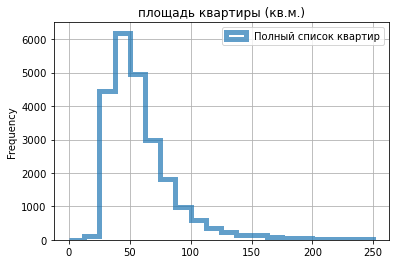

In [19]:
show_hist('total_area', 20, (0, 250), 'площадь квартиры', 'кв.м.')
print('Квартир от 200 кв.м.: ', len(data.query('total_area > 200')), 'шт')

***Вывод***:
Из графика видим, что квартиры площадью более 200 кв.м. встречаются крайне редко, но бывают и 'дворцы' до 900 кв.м.

Отношение общей плошади к жилой 

count   23,355.00
mean         1.84
std          0.54
min          1.00
25%          1.57
50%          1.76
75%          2.01
max         46.33
Name: ratio_total_to_living, dtype: float64
Квартир с Соотношением свыше 4х:  50 шт


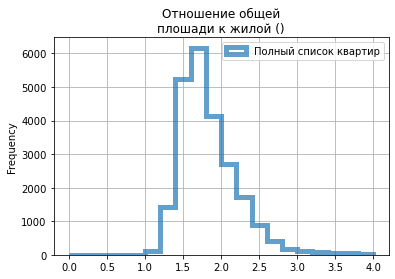

In [20]:
show_hist('ratio_total_to_living', 20, (0, 4), 'Отношение общей\nплошади к жилой' )
print('Квартир с Соотношением свыше 4х: ', len(data.query('ratio_total_to_living > 4.0')), 'шт')

***Вывод***: в большинстве случаев отношение общей плошади к жилой составляет от 1,2 до 2,5. Больше 3,5 очень большая редкость, но есть и с огромным соотношением - 46.3.

Количество комнат

count   23,355.00
mean         2.08
std          1.07
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64
Квартир с кол-вом комнат свыше 8:  19 шт


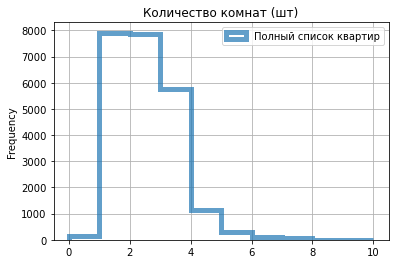

In [21]:
show_hist('rooms', 10, (0, 10), 'Количество комнат', 'шт')
print('Квартир с кол-вом комнат свыше 8: ', len(data.query('rooms > 8.0')), 'шт')

***Вывод***: Самая большая масса квартир имеют от 1 до 4-5 комнат. А вот свыше 8 это редчайший случай, у нас их всего 19.


Высота потолков

count   23,355.00
mean         2.70
std          0.24
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64
Квартир с высотой потолков свыше 4м:  50 шт


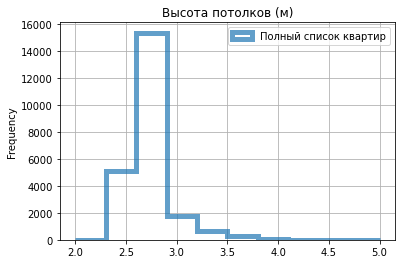

In [22]:
show_hist('ceiling_height', 10, (2, 5), 'Высота потолков', 'м')
print('Квартир с высотой потолков свыше 4м: ', len(data.query('ceiling_height > 4.0')), 'шт')

***Вывод***: Большинство потолков квартир находится в диапазоне от 2.3 до 3.5м, свыше 4х редкость - всего 74 квартиры.

Время продажи квартир. Как обычно, выведем диапазон, который можно наглядно оценить

count   20,199.00
mean       181.33
std        219.97
min          1.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64
181.32600623793257
96.0


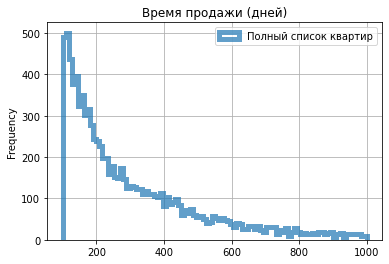

In [23]:
#data['days_exposition'].hist(bins=100, , legend=True, range=(100,1000))
show_hist('days_exposition', 100, (100, 1000), 'Время продажи', 'дней')

print(data['days_exposition'].mean())
print(data['days_exposition'].median())

***Вывод***: В среднем продажа квартир занимает 169 дней, медиана - 95 дней. А вот примерно после 220 мы видим, что график становится значительно более пологим 

**Какие факторы больше всего влияют на стоимость квартиры**

In [24]:
# сделать медианы
def show_corr(df, col1, col2):
    df.plot(x=col1, y=col2, kind='scatter')
    print(f"Зависимость {col1} и {col2}:", df[col1].corr(df[col2]))

def show_corr_plot(df, col1, col2, title='', label = ''):
    selection = df.groupby(col1)[col2].median()
    selection.plot(kind='bar', title=title, label='')
    print('Отношение минимума к максимуму:', selection.min() / selection.max())

Влияние на цену площади квартир

Квартир с площадью более 200 кв.м.: 206


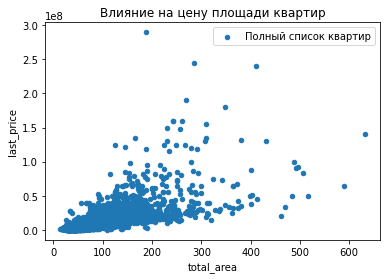

In [25]:
total_area = data.query('last_price < 3e8').plot(x='total_area', y='last_price', kind='scatter', title='Влияние на цену площади квартир', label=main_labels[0])

print ('Квартир с площадью более 200 кв.м.:', len(data.query('total_area > 200')))

***Вывод***: Из графика видим, что нижняя граница прогрессирует вверх от 150 кв.м., и более менее равномерно идет пости до 400кв.м. А вот верхняя относительно равномерно растет до 200 кв.м., а далее резко устремляется вверх, но таких квартир вообще мало (всего 206).

Влияние на цену количества комнат

<AxesSubplot:title={'center':'Влияние на цену количества комнат'}, xlabel='rooms', ylabel='last_price'>

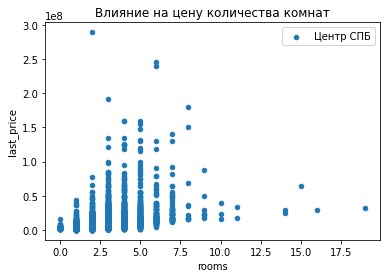

In [26]:
data.query('last_price < 3e8').plot(x='rooms', y='last_price', kind='scatter', title='Влияние на цену количества комнат', label=main_labels[1])

***Вывод***: По графику видна такая зависимость: до 5 комнат довольно четко прослживаются верхние цееники на квартиры, не считая выбросов, до 7 комнат граница чуть менее четкая, далее совсем размывается. Также свыше 5 комнат видим, что нижний ценник ощутимо повышается.

Влияние на цену расстояния от центра

<AxesSubplot:title={'center':'Влияние на цену расстояния от центра'}, xlabel='city_centers_nearest', ylabel='last_price'>

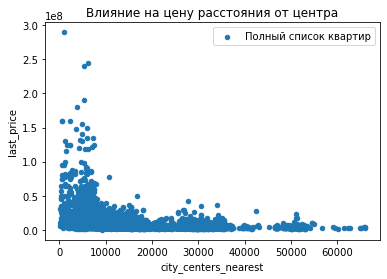

In [27]:
data.query('last_price < 3e8').plot(x='city_centers_nearest', y='last_price', kind='scatter', title='Влияние на цену расстояния от центра', label=main_labels[0])

***Вывод***: Тут опять же, хоть и коэффициент корреляции нулевой, по графику видим что максимальная стоимость квартир лежит ближе к центру (примерно до 8000м)

Влияние на цену типа этажа

<AxesSubplot:title={'center':'Влияние на максимальную цену типа этажа'}, xlabel='floor_type'>

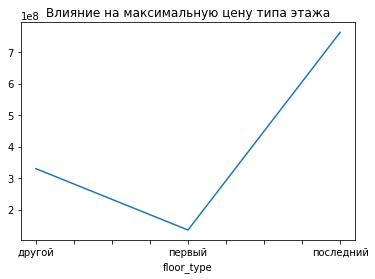

In [28]:
data.groupby('floor_type')['last_price'].max().plot(title='Влияние на максимальную цену типа этажа')

<AxesSubplot:title={'center':'Влияние на среднюю цену типа этажа'}, xlabel='floor_type'>

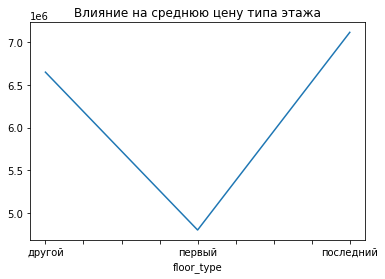

In [29]:
data.groupby('floor_type')['last_price'].mean().plot(title='Влияние на среднюю цену типа этажа')

***Вывод***: Как средняя так и максимальная стоимость на первых этажах самая маленькая, а вот на последних наоборот самая высокая.

**Теперь посмотрим влияние даты размещения объявления**

Влияние на цену дня недели

Отношение минимума к максимуму: 0.9578947368421052


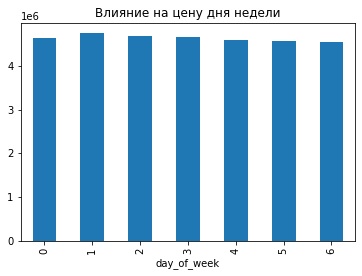

In [30]:
show_corr_plot(data, 'day_of_week', 'last_price', 'Влияние на цену дня недели')

***Вывод***: Во вторник - наибольшая цена, в воскресенье - наименьшая, но между соседними днями перепады незначительные.

Влияние на цену месяца

Отношение минимума к максимуму: 0.9166666666666666


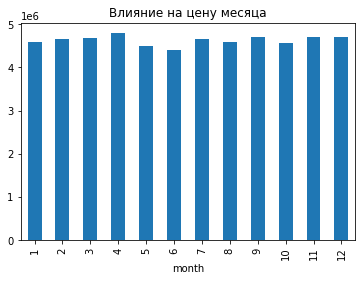

In [31]:
show_corr_plot(data, 'month', 'last_price', 'Влияние на цену месяца')

***Вывод***: получается что стоимость квартир по медиане самая высокая в апреле и самая низкая в июне.

Влияние на цену года

Отношение минимума к максимуму: 0.5844155844155844


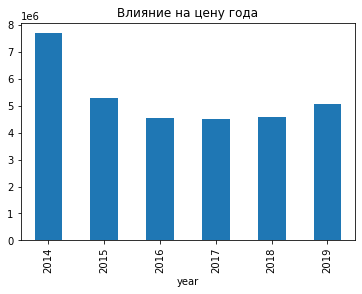

In [32]:
show_corr_plot(data, 'year', 'last_price', 'Влияние на цену года')

***Вывод***: тут мы видим, что в разные года цена значительно отличается. Разница более 41%, так что, год очень важный фактор при определении цены.

Выберем 10 населённых пунктов с наибольшим числом объявлений

In [33]:
locality_top_10 = data['locality_name'].value_counts()[:10]
locality_top_10 = pd.DataFrame({'locality_name':locality_top_10.index, 'count':locality_top_10.values})
locality_top_10.merge(data.groupby('locality_name')['price_m2'].mean(), on='locality_name').sort_values('price_m2', ascending=False)
locality_top_10

,locality_name,count
0,Санкт-Петербург,15535
1,поселок Мурино,511
2,поселок Шушары,440
3,Всеволожск,396
4,Пушкин,366
5,Колпино,337
6,поселок Парголово,326
7,Гатчина,307
8,деревня Кудрово,286
9,Выборг,237


***Вывод***: Из десятки лидеров по частоте объявлений самое дорогое жилье в Санкт-Петербурге и в Пушкине, самые же дешевые в Выборге

Теперь определим цены для Санкт-Петербурга в зависимости от удаленности от центра. И построим график средних цен для каждого километра.

<AxesSubplot:title={'center':'Цены для Санкт-Петербурга в зависимости\nот удаленности от центра'}, xlabel='distance_to_center_km'>

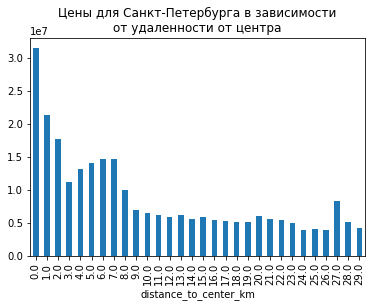

In [34]:
data['distance_to_center_km'] = round(data['city_centers_nearest'] / 1000, 0)
spb_localities = data.query('locality_name == "Санкт-Петербург"')

spb_localities.groupby('distance_to_center_km')['last_price'].mean().plot(kind='bar', title='Цены для Санкт-Петербурга в зависимости\nот удаленности от центра')

***Вывод***: Судя по графику, граница центра находится где-то около 8го километра.

count         3,661.00
mean     14,443,434.12
std      24,120,050.03
min       1,600,000.00
25%       6,590,000.00
50%       9,000,000.00
75%      14,000,000.00
max     763,000,000.00
Name: last_price, dtype: float64


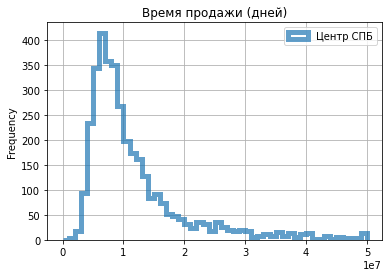

In [35]:
spb_center = spb_localities.query('city_centers_nearest < 8000')
show_hist('last_price', 50, (0, 5e7), 'Время продажи', 'дней', True, spb_center)

#pb_center['last_price'].hist(bins=50, range=(0, 5e7))

***Вывод***: Основная масса квартир в центре получается от 5млн до 15 млн.

**Также рассмотрим аналогичные параметры для центральной части**

Количество комнат

count   3,661.00
mean        2.81
std         1.45
min         0.00
25%         2.00
50%         3.00
75%         3.00
max        19.00
Name: rooms, dtype: float64


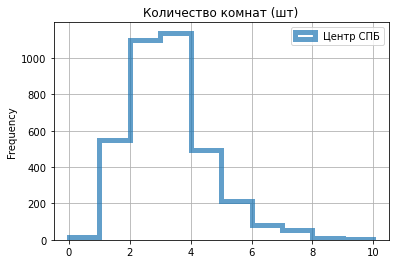

In [36]:
show_hist('rooms', 10, (0, 10), 'Количество комнат', 'шт', True, spb_center)

***Вывод***: Основаная масса квартир в центре от 1 до 5 комнат.

Высота потолков

count   3,661.00
mean        2.93
std         0.37
min         2.00
25%         2.65
50%         2.80
75%         3.11
max         6.00
Name: ceiling_height, dtype: float64


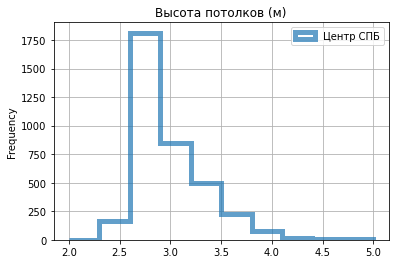

In [45]:
#spb_center['ceiling_height'].hist(bins=10, range=(2, 5))

show_hist('ceiling_height', 10, (2, 5), 'Высота потолков', 'м', True, spb_center)

***Вывод***: Основаная высота потолков в центре от 2,5 до 3,7 м.

**Также рассмотрим какие факторы больше всего влияют на стоимость квартиры в центральной части**

Влияние на цену площади квартир

<AxesSubplot:title={'center':'Влияние на цену площади квартир'}, xlabel='total_area', ylabel='last_price'>

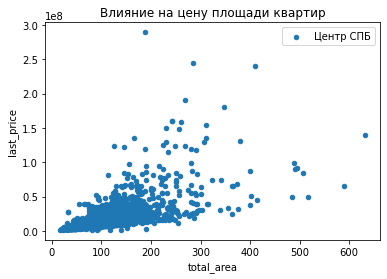

In [38]:
spb_center.query('last_price < 3e8').plot(x='total_area', y='last_price', kind='scatter', title='Влияние на цену площади квартир', label=main_labels[1])

***Вывод***: Нижняя граница цен отрывается вверх от 100 кв.м., и более менее равномерно идет почти до 400кв.м. А вот верхняя относительно равномерно растет до 200 кв.м., а далее более резко устремляется вверх

Влияние на цену количества комнат

<AxesSubplot:title={'center':'Влияние на цену количества комнат'}, xlabel='rooms', ylabel='last_price'>

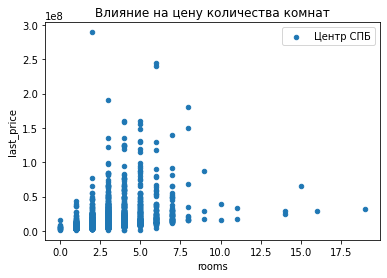

In [39]:
spb_center.query('last_price < 3e8').plot(x='rooms', y='last_price', kind='scatter', title='Влияние на цену количества комнат', label=main_labels[1])

***Вывод***: Зависимость по центру аналогична зависимости по всей базе: до 5 комнат довольно четко прослеживаются верхние ценники на квартиры, не считая выбросов, до 7 комнат граница чуть менее четкая, далее совсем размывается. Также свыше 5 комнат видим, что нижний ценник ощутимо повышается.

Влияние на цену типа этажа

<AxesSubplot:title={'center':'Влияние на максимальную цену типа этажа'}, xlabel='floor_type'>

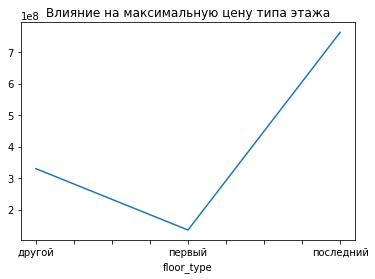

In [40]:
spb_center.groupby('floor_type')['last_price'].max().plot(title='Влияние на максимальную цену типа этажа')

<AxesSubplot:title={'center':'Влияние на среднюю цену типа этажа'}, xlabel='floor_type'>

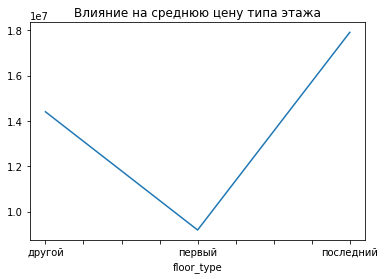

In [41]:
spb_center.groupby('floor_type')['last_price'].mean().plot(title='Влияние на среднюю цену типа этажа')

***Вывод***: Как средняя так и максимальная стоимость на первых этажах самая маленькая, а на последних наоборот самая высокая.

Влияние на цену дня недели

Отношение минимума к максимуму: 0.9073441502988898


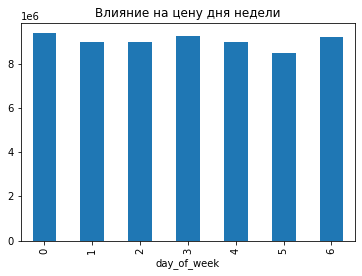

In [42]:
show_corr_plot(spb_center, 'day_of_week', 'last_price', 'Влияние на цену дня недели')

***Вывод***: В понедельник - наибольшая цена, в субботу - наименьшая, есть значительные перепады между соседними днями. То есть тут ситуация явно отличается от общей картины.

Влияние на цену месяца

Отношение минимума к максимуму: 0.8696096987058162


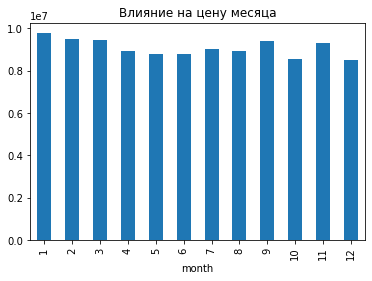

In [43]:
show_corr_plot(spb_center, 'month', 'last_price','Влияние на цену месяца')

***Вывод***: получается что стоимость квартир по медиане самая высокая в январе и самая низкая в октябре и декабре.

Влияние на цену года

Отношение минимума к максимуму: 0.43994141414141413


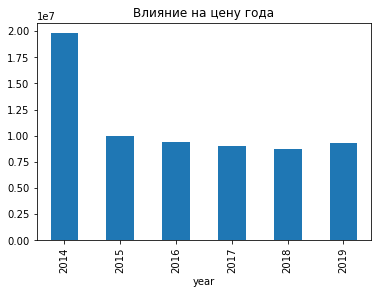

In [44]:
show_corr_plot(spb_center, 'year', 'last_price','Влияние на цену года')

***Вывод***: Аналогично общей картине: год и тут очень важный фактор.

### Теперь еще раз выпишем все сделанные выводы.

**Выводы по всем имеющимся квартирам:**
-  квартиры площадью более 200 кв.м. встречаются крайне редко, но бывают и 'дворцы' до 900 кв.м.
-  в большинстве случаев отношение общей плошади к жилой составляет от 1,2 до 2,5. Больше 3,5 очень большая редкость, но есть и с огромным соотношением - 46.3.
-  Самая большая масса квартир имеют от 1 до 4-5 комнат. А вот свыше 8 это редчайший случай, у нас их всего 19.
-  Большинство потолков квартир находится в диапазоне от 2.3 до 3.5м, свыше 4х редкость - всего 74 квартиры.
-  В среднем продажа квартир занимает 169 дней, медиана - 95 дней. А вот примерно после 220 мы видим, что график становится значительно более пологим
-  по площади нижняя граница цен прогрессирует вверх от 150 кв.м., и более менее равномерно идет пости до 400кв.м. А вот верхняя относительно равномерно растет до 200 кв.м., а далее резко устремляется вверх, но таких квартир вообще мало (всего 206).
-  до 5 комнат довольно четко прослживаются верхние ценники на квартиры, не считая выбросов, до 7 комнат граница чуть менее четкая, далее совсем размывается. Также свыше 5 комнат видим, что нижний ценник ощутимо повышается.
- максимальная стоимость квартир лежит ближе к центру (примерно до 8000м)
-  Как средняя так и максимальная стоимость на первых этажах самая маленькая, а вот на последних наоборот самая высокая.
-  Во вторник - наибольшая цена, в воскретсень - наименьшая, но между соседними днями перепады незначительные.
- по медиане самая высокая в апреле и самая низкая в июне.
- в разные года цена значительно отличается. Год - очень важный фактор при определении цены.
- самое дорогое жилье в Санкт-Петербурге и в Пушкине, самые же дешевые в Выборге


**Выводы по центральной части Санкт-Петербурга, отличающиеся от выводов по всем квартирам:**
- граница центра находится где-то около 8го километра.
- основная масса квартир в центре получается от 5млн до 15 млн.
- основаная масса квартир в центре от 1 до 5 комнат.
- основаная высота потолков в центре от 2,5 до 3,7 м.
- нижняя граница цен отрывается вверх от 100 кв.м., и более менее равномерно идет почти до 400кв.м. А вот верхняя относительно равномерно растет до 200 кв.м., а далее более резко устремляется вверх
- в понедельник - наибольшая цена, в субботу - наименьшая, есть значительные перепады между соседними днями.
- стоимость квартир по медиане самая высокая в январе и самая низкая в октябре и декабре.

**Вывод**

Центральная часть Санкт-Петербурга имеет некоторые свои обособленные значения показателей и поэтому должна рассматриваться отдельно.

## Общий вывод

Из проведенного анализа можно сказать, что для создания автоматизированной системы необходимо воспользоваться параметрами, указанными в выводах по всем имеющимся квартирам, а также создать отдельные условия для квартир, находящихся в центральной части Санкт-Петербурга. Для отслеживания аномалий и мошеннических действий, нужно чтобы система оповещала пользователя для более детального рассмотрения квартир, которые будут иметь большое отклонение от вычисленной цены. А также система должна оповещать о всех квартирах, которые выходят за пределы показателей, определенных как средние, по любым параметрам.